In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
print("hellow")

hellow


In [3]:
df=pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

In [4]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [10]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True,dtype=int)

In [13]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [14]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [15]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [16]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [18]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (8000, 11)
X_test (2000, 11)
y_train (8000,)
y_test (2000,)


In [19]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [20]:
X_train_scaled[0:5]

array([[-0.23082038, -0.94449979, -0.70174202,  0.58817274,  0.80225696,
        -1.55337352,  0.97725852,  0.42739449,  1.71490137, -0.57273139,
         0.91509065],
       [-0.25150912, -0.94449979, -0.35520275,  0.46984886,  0.80225696,
        -1.55337352, -1.02327069, -1.02548708, -0.58312392, -0.57273139,
        -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579,  0.85878772, -0.91150957,
         0.64376017,  0.97725852, -0.94479772,  1.71490137, -0.57273139,
        -1.09278791],
       [-0.04462173,  1.25262228,  0.33787579,  0.56560403,  0.80225696,
        -1.55337352,  0.97725852, -0.55194615,  1.71490137, -0.57273139,
        -1.09278791],
       [ 0.6587954 , -0.56239161,  1.03095433,  0.730395  , -0.91150957,
        -1.55337352, -1.02327069,  1.0833828 , -0.58312392,  1.74601919,
         0.91509065]])

In [21]:
X_test_scaled[0:5]

array([[-1.03768121,  0.77498705, -1.0482813 , -1.22599173,  0.80225696,
         0.64376017,  0.97725852, -0.05360571, -0.58312392, -0.57273139,
         0.91509065],
       [ 0.30708683, -0.46686456, -0.70174202,  1.07152411, -0.91150957,
         0.64376017, -1.02327069, -0.58392685, -0.58312392, -0.57273139,
         0.91509065],
       [-1.23422423,  0.29735181, -1.0482813 , -1.22599173,  0.80225696,
        -1.55337352,  0.97725852, -0.16685331, -0.58312392, -0.57273139,
        -1.09278791],
       [ 0.61741792, -0.46686456,  1.03095433,  1.14432271,  0.80225696,
        -1.55337352,  0.97725852, -1.71234407,  1.71490137, -0.57273139,
         0.91509065],
       [-1.11009179, -0.84897275,  0.33787579, -0.04781879, -0.91150957,
         0.64376017,  0.97725852,  1.32964236,  1.71490137, -0.57273139,
         0.91509065]])

In [22]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2024-03-31 12:48:11.051794: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-31 12:48:11.051977: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-31 12:48:11.192150: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [23]:
model = Sequential()
model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(loss='binary_crossentropy',optimizer='Adam')
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5664
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4963
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4730
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4514  
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - loss: 0.4505
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 0.4408
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 0.4379
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 0.4312
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4322
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 0.4272


In [26]:
model.layers[0].get_weights()

[array([[ 0.5321437 , -0.16643476, -0.12496165],
        [-0.6012334 ,  0.5356886 , -1.9822527 ],
        [ 0.2855549 ,  0.20177124, -0.00724627],
        [-0.47220278,  0.31250477, -0.2875731 ],
        [ 0.02943914, -0.00365883,  0.02225431],
        [-0.14528127, -0.03819135,  0.05952964],
        [ 1.069666  , -0.9151103 ,  0.45954528],
        [ 0.4472635 ,  0.40644148, -0.1926227 ],
        [-0.57791924,  0.81685084, -0.45201293],
        [ 0.02233555,  0.22885889, -0.03451133],
        [ 0.23688127, -0.10486731,  0.5531419 ]], dtype=float32),
 array([ 0.40645272, -0.25177866,  0.3612116 ], dtype=float32)]

In [27]:
model.layers[1].get_weights()

[array([[-0.8450354 ],
        [ 0.42397672],
        [-1.8364611 ]], dtype=float32),
 array([-0.25069642], dtype=float32)]

In [28]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [29]:
y_log

array([[0.11575335],
       [0.14010726],
       [0.12773596],
       ...,
       [0.06481926],
       [0.1357753 ],
       [0.39328218]], dtype=float32)

In [30]:
y_pred=np.where(y_log>0.5,1,0)

In [31]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.81

## changing parameter in above code for better accuracy

In [33]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3759 - loss: 0.9151 - val_accuracy: 0.8000 - val_loss: 0.5064
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7890 - loss: 0.4996 - val_accuracy: 0.7987 - val_loss: 0.4530
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8020 - loss: 0.4560 - val_accuracy: 0.8062 - val_loss: 0.4332
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8179 - loss: 0.4196 - val_accuracy: 0.8106 - val_loss: 0.4184
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8204 - loss: 0.4122 - val_accuracy: 0.8206 - val_loss: 0.3995
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8354 - loss: 0.3993 - val_accuracy: 0.8350 - val_loss: 0.3808
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8498 - loss: 0.3783 - val_accuracy: 0.8431 - val_loss: 0.3684
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8534 - loss: 0.3692 - val_accu

In [36]:
model.layers[0].get_weights()

[array([[-1.8519185e-01,  6.7552492e-02, -3.3723496e-02, -2.2545862e-01,
         -2.2440532e-02,  1.0103363e-01, -1.7101212e-01,  2.4416979e-01,
         -1.4726837e-01,  9.9551909e-02, -3.1274432e-01],
        [ 4.4412369e-01,  1.0205320e+00, -3.3141539e-01,  3.5881734e-01,
          9.1387635e-01, -7.3786932e-01,  1.1950315e-03, -6.3799155e-01,
          7.2202921e-01, -2.2049540e-01, -9.3949711e-01],
        [-8.6312197e-02, -3.9397843e-02,  2.2368494e-01, -5.6497252e-01,
         -2.6476447e-02, -9.0105303e-02,  2.9258281e-01, -1.5107293e-01,
          2.0538846e-01, -1.8960494e-01, -3.9738752e-02],
        [-4.2790464e-01,  3.3088613e-01, -6.2677741e-01, -1.3208109e-01,
         -4.7737628e-02,  3.4584326e-01,  3.0136344e-01, -5.6051022e-01,
         -6.7437999e-02,  3.8917637e-01,  9.2505075e-02],
        [-1.0613446e+00, -1.7070708e-01, -7.8571454e-02,  4.5054156e-01,
          9.6661711e-01, -1.3707583e-01,  9.8995310e-01, -9.2618121e-03,
         -4.9103275e-03,  1.0012946e+0

In [37]:
model.layers[1].get_weights()

[array([[ 0.35498598,  0.2594994 ,  0.7269949 , -0.15727115,  0.5077457 ,
         -0.6109172 ,  0.42906177,  0.54452807, -0.3515513 , -0.4985682 ,
         -0.6585119 ],
        [ 0.3236581 ,  0.14070806, -0.03487539, -0.2084835 , -0.06208181,
         -0.37911457, -0.36287254,  0.15147384, -0.9743514 , -0.05149709,
         -0.48147538],
        [-0.2884662 , -0.1404798 ,  0.562814  ,  0.22332218,  0.4142332 ,
          0.25324723,  0.1414627 , -0.673499  , -0.05430783,  0.01900011,
          0.39178663],
        [ 0.50037724, -0.26899257, -0.79146594,  0.01159941,  0.14986001,
          0.5902808 ,  0.17109308,  0.16442214,  0.4911036 ,  0.01387679,
          0.3791678 ],
        [ 0.15902919,  0.29301837, -1.5527146 ,  0.10451373,  0.88353306,
          0.54495454,  0.34789035,  0.00184492,  0.30055258,  0.70689684,
         -0.77397877],
        [-0.18610708, -0.36803022, -0.6141093 , -0.25798342, -0.11408629,
          0.5094327 , -0.7651916 , -0.6435088 ,  0.17277421, -0.3899582

In [38]:
y_log=model.predict(X_test_scaled)
y_pred=np.where(y_log>0.5,1,0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.863

In [40]:
history.history

{'accuracy': [0.5699999928474426,
  0.7973437309265137,
  0.8065624833106995,
  0.8139062523841858,
  0.8237500190734863,
  0.8414062261581421,
  0.8510937690734863,
  0.8553125262260437,
  0.8548437356948853,
  0.8571875095367432,
  0.8573437333106995,
  0.8584374785423279,
  0.8579687476158142,
  0.860156238079071,
  0.8604687452316284,
  0.8612499833106995,
  0.8596875071525574,
  0.8614062666893005,
  0.8606250286102295,
  0.8617187738418579,
  0.8620312213897705,
  0.8614062666893005,
  0.8617187738418579,
  0.8607812523841858,
  0.8631250262260437,
  0.8634374737739563,
  0.8634374737739563,
  0.8650000095367432,
  0.8639062643051147,
  0.8635937571525574,
  0.8648437261581421,
  0.8653125166893005,
  0.8656250238418579,
  0.8654687404632568,
  0.8660937547683716,
  0.8645312786102295,
  0.8631250262260437,
  0.8648437261581421,
  0.8673437237739563,
  0.8667187690734863,
  0.8670312762260437,
  0.8668749928474426,
  0.8671875,
  0.8667187690734863,
  0.8667187690734863,
  0.8668

In [41]:
import matplotlib.pyplot as plt

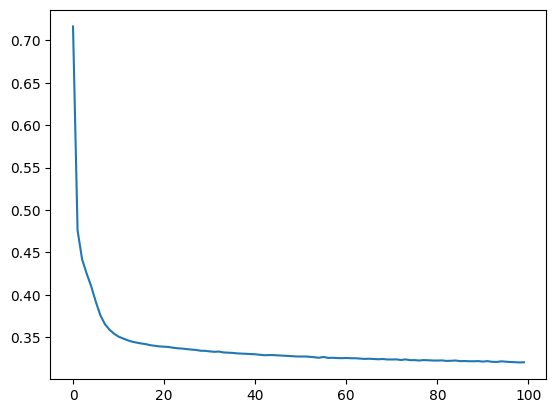

In [42]:
plt.plot(history.history['loss'])

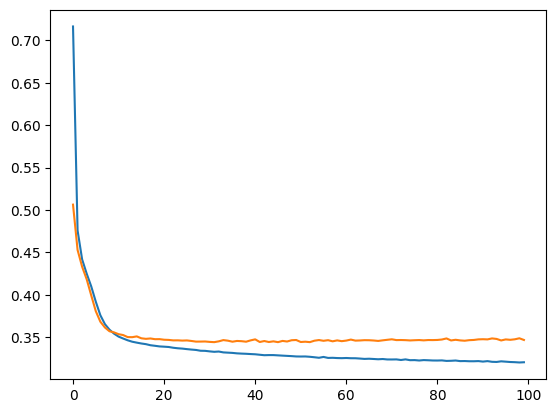

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

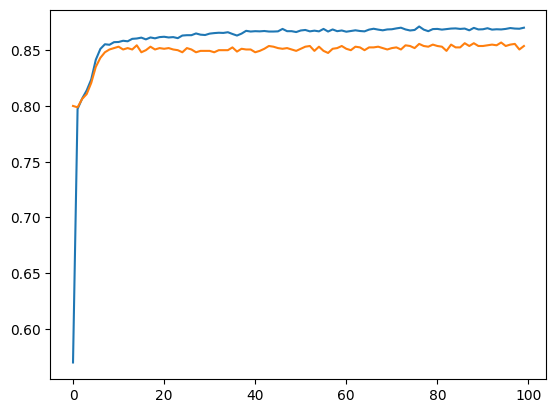

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])